In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_moons, make_circles
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

from src.nn import Dense as mDense
# from src.nn import Dropout as mDropout
from src.nn import ReLU, Softmax, NeuralNetwork

%matplotlib inline

np.seterr(all='raise')
np.random.seed(42)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

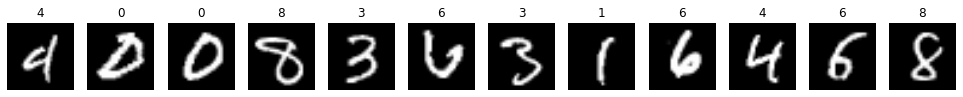

In [4]:
plt.figure(figsize=(17, 8))
indexes = np.random.randint(0, 60000, 12)
for i, idx in enumerate(indexes):
    label = y_train[idx]
    image = x_train[idx]
    plt.subplot(2, 12, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray', interpolation='bilinear')
    plt.title('%i' % label)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
input_shape = (x_train.shape[1], )
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [7]:
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(loss='sparse_categorical_crossentropy' , optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15, batch_size=32)
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.argmax(model.predict(x_test), axis=-1)
print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Epoch 1/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.6306 - acc: 0.8425
Epoch 2/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3345 - acc: 0.9058
Epoch 3/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2867 - acc: 0.9192
Epoch 4/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2564 - acc: 0.9276
Epoch 5/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2337 - acc: 0.9336
Epoch 6/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2157 - acc: 0.9394
Epoch 7/15
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2002 - acc: 0.9440
Epoch 8/15
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1873 - acc: 0.9474
Epoch 9/15
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1758 - acc: 0.9506
Epoch 10/15
60000/60000 [==============================] - 2s 36us/sample - loss: 

--------------------
Treinamento:
--------------------
Acurácia: 97.85%
Classification report for classifier 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


--------------------
Confusion matrix:
[[ 969    0    1    1    0    0    2    2    2    3]
 [   0 1121    4    0    0    0    2  

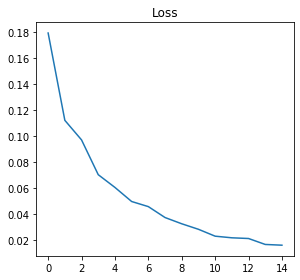

In [8]:
final_error = []
better_acc = 0

layers = (
    mDense(inputs=x_train.shape[1], outputs=100, activation=ReLU),
    mDense(inputs=100, outputs=10, activation=Softmax),
)

md = NeuralNetwork(layers, batch_size=32)
print('-' * 20)
print('Treinamento:')
error = md.train(x_train.copy(), y_train.copy(), epochs=15)

y_pred = md.predict(x_test.copy())
acc = np.round((np.sum(y_pred == y_test) / len(y_test)) * 100, 2)
if acc > better_acc:
    better_acc = acc
final_error = error
print('-' * 20)
print(f'Acurácia: {acc}%')

print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

if len(final_error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(final_error)), final_error)
    plt.tight_layout()
    plt.show()